# Predicting Heart Disease with Classification
We will use various ML libraries to build a classification model capable of predicting whether a patient has heart disease based on their medical attributes as features

The approach we will use:

1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters, can we predict whether a patient has heart disease?

## 2. Data

The original data came from UCI ML repository. 

## 3. Evaluation

> If our proof of concept machine-learning model can reach 95% accuracy in classification, we will persue the project.

## 4. Features

The UCI dataset has 14 features.

**I would create a data dictionary, but that is too involved for just going through the video**

* featureA: meaning
* featureB: meaning
* etc. etc.

## Preparing the tools
We will use pandas, matplotlib, and numpy for data analysis and manipulation.



In [1]:
#Import all of the tools we need

#Regular eda and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Remember to install seaborn in conda env. 
#import seaborn as sns

#Need our plots to appear inside the notebook
%matplotlib inline

#Get all of our models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Get our evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve


## Load our data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Now we would explore our data EDA (Exploratory Data Analysis)
1. What question are we trying to solve for?
2. What kinds of data do we have, and how will we treat them?
3. Are there any missing data?
4. Are there any outliers?
5. Can we add, update, or delete features to get more out of the data set?

In [3]:
#See how many of either target we have
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

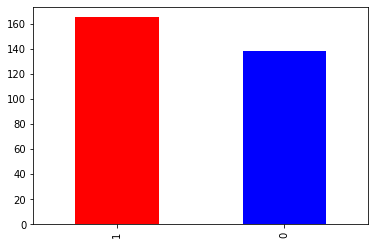

In [4]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [5]:
#What kind of data do we have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency According to Sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


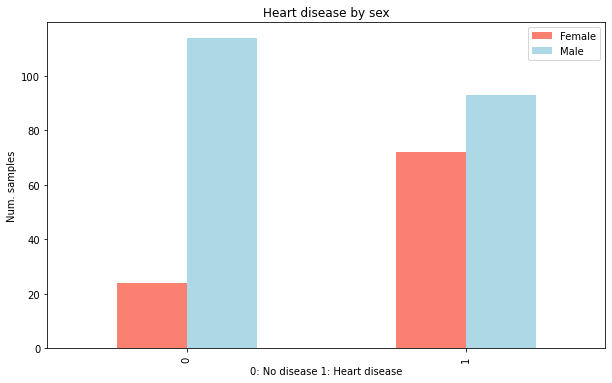

In [10]:
#We will plot the crosstab results

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart disease by sex")
plt.xlabel("0: No disease 1: Heart disease")
plt.ylabel("Num. samples")
plt.legend(["Female", "Male"]);

Proportionally, our sample shows around 75% positive for heart disease in the case of females, and about 45% positive for males. We also know from target barplot that around 55% of total samples are positive. This means a baseline precision would need to perform better than 55% given a patient's sex.

## Age vs. Max Heart Rate as Indicators of Heart Disease

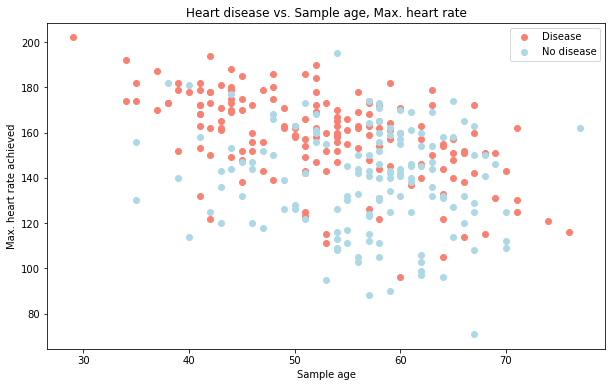

In [11]:
plt.figure(figsize=(10, 6))

#Plot our positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="salmon")

#Plot our negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="lightblue");

plt.title("Heart disease vs. Sample age, Max. heart rate")
plt.ylabel("Max. heart rate achieved")
plt.xlabel("Sample age")
plt.legend(["Disease", "No disease"]);

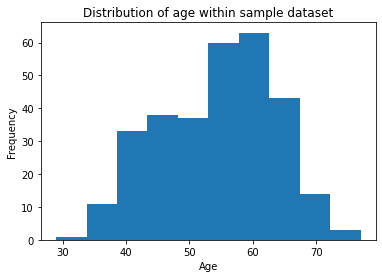

In [12]:
#Plot the spread of samples' age
df.age.plot(kind="hist")

plt.title("Distribution of age within sample dataset")
plt.xlabel("Age");

## Frequency of Heart Disease by Type of Chest Pain

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


It looks like chest pain type 1 has a higher proportion of positive cases, whereas type 0 has a higher proportion of negative cases. Also noteworthy is the 2:1 positive correlation in type 3.

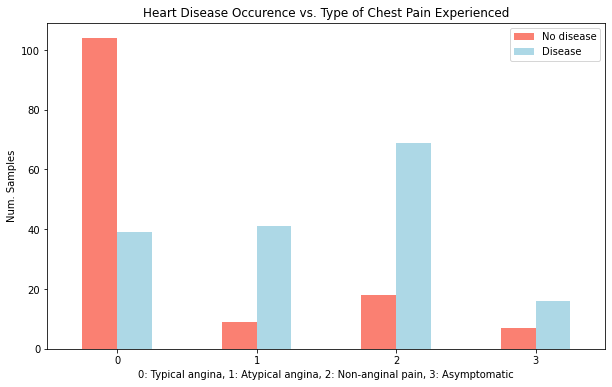

In [14]:
#Plot the crosstab data
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Occurence vs. Type of Chest Pain Experienced")
plt.ylabel("Num. Samples")
plt.xlabel("0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=1);

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [16]:
import seaborn as sns

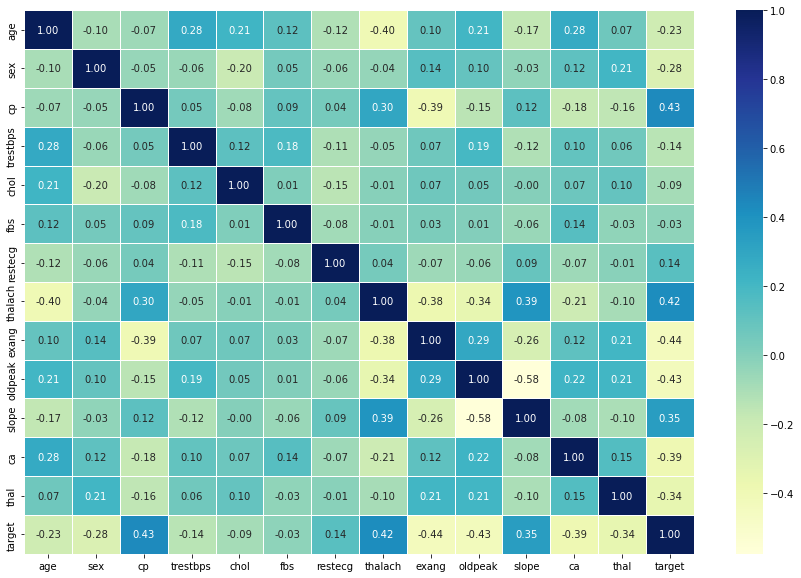

In [17]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data=corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## 5. Modelling

In [18]:
#We will split our data into X and y sets, then into train, test splits

X = df.drop("target", axis=1)
y = df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.size, X_test.size

(3146, 793)

Now that we have our training and test sets split, we can train a classification model and evaluate it on the test set of data.

We will try out 3 different models:
1. Logistic Regression
2. K-Nearest-Neighbotrs Classifier
3. Random Forest Classifier

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
#Put the model instantiations into a dictionary and then create a function to speed up the training and testing

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit models to training data and score on test data
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #Set a random seed
    np.random.seed(42)
    #Create a dictionary to return containing model name and score
    model_scores = {}
    for (name, inst) in models.items():
        inst.fit(X_train, y_train)
        score = inst.score(X_test, y_test)
        model_scores[name] = score
    return model_scores
        

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/brandybeckman/Desktop/DataScienceUDemy/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.7540983606557377,
 'Random Forest': 0.8524590163934426}

### Plotting Model Accuracy

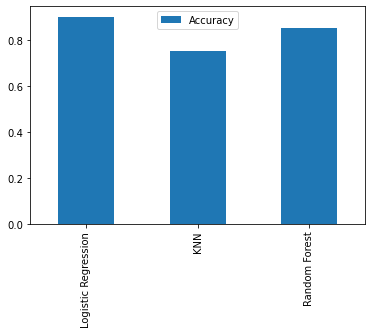

In [23]:
model_comp = pd.DataFrame(model_scores, index=["Accuracy"])
model_comp.T.plot.bar();

We now have a baseline model using Logistic Regression. Next, we need to look at tuning the hyperparamters as well as determining the model's scores using other classification metrics.

We will look at:

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross validation
5. Precision
6. Recall
7. F1
8. Classification Report
9. ROC curve
10. AOC

## Hyperparameter Tuning

In [24]:
#Will tune KNN first

train_scores = []
test_scores = []

#First paramster we will tune is 'n_neighbors'
neighbors = range(1, 21)

#Instantiate KNN
knn = KNeighborsClassifier()

for n in neighbors:
    knn.set_params(n_neighbors=n)
    
    knn.fit(X_train, y_train)
    
    test_scores.append(knn.score(X_test, y_test))
    
    train_scores.append(knn.score(X_train, y_train))
    
train_scores, test_scores


([1.0,
  0.78099173553719,
  0.7644628099173554,
  0.7520661157024794,
  0.78099173553719,
  0.7520661157024794,
  0.731404958677686,
  0.71900826446281,
  0.7396694214876033,
  0.7024793388429752,
  0.6983471074380165,
  0.7024793388429752,
  0.7148760330578512,
  0.7148760330578512,
  0.6776859504132231,
  0.7024793388429752,
  0.6859504132231405,
  0.6859504132231405,
  0.6983471074380165,
  0.6942148760330579],
 [0.7049180327868853,
  0.6065573770491803,
  0.6557377049180327,
  0.639344262295082,
  0.7540983606557377,
  0.7377049180327869,
  0.7049180327868853,
  0.7213114754098361,
  0.6721311475409836,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.6885245901639344,
  0.6885245901639344,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6721311475409836,
  0.6721311475409836,
  0.639344262295082])

Maximum test score: 75.41%


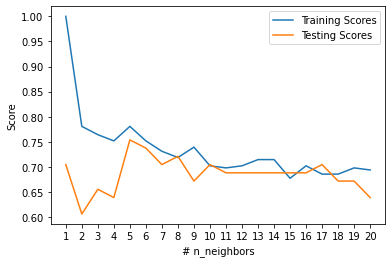

In [25]:
#Now we will plot our results

plt.plot(neighbors, train_scores, label="Training Scores")
plt.plot(neighbors, test_scores, label="Testing Scores")
plt.xlabel("# n_neighbors")
plt.xticks(np.arange(1, 21, 1))
plt.ylabel("Score")
plt.legend()

print(f"Maximum test score: {max(test_scores) * 100 :.2f}%")

In my example, n_neighbors seems to yield the highest testing scores at 9, but the max sore of 63.93% probably means KNN is not the best model for this project. To speed up the hyperparameter tuning for Logistic regression and RFC, we will use `RandomizedSearchCV`.

In [26]:
#Create a hyperparameter grid for Logisitic Regression
lreg_grid = {"C": np.logspace(-4, 4, 20), "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}


Now that we have our hyperparam grids, we can tune the models using `RandomizedSearchCV`

In [27]:
# Do a randomized search for the Logisic Regression model

#set up a random seed
np.random.seed(42)

rs_lreg = RandomizedSearchCV(LogisticRegression(), param_distributions=lreg_grid, cv=5, n_iter=20, verbose=True)

#Fit the data to the model
rs_lreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_lreg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [29]:
rs_lreg.score(X_test, y_test)

0.8852459016393442

In [30]:
#Now we will tune our RFC using the same randomized search method
np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

#Finally fit the data
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [32]:
rs_rfc.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning using GridSearchCV
Now that we have narrowed our model selection down to logistic regression, we can exhaustively search for optimal hyperparameters using `GridSearchCV`.

In [33]:
#Set up a new grid to search through
lreg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}

#Create a new grid search
lreg_gs = GridSearchCV(LogisticRegression(), param_grid=lreg_grid, cv=5, verbose=True)

#Fit the test data to the new model
lreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
lreg_gs.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [35]:
lreg_gs.score(X_test, y_test)

0.8852459016393442

## Evaluating our Tuned Classifier Beyond the Accuracy Metric

Now that we have tuned our hyperparameters and have a respectable score, we need to evaluate the classifier on a variety of other metrics, using cross-validation whenever possible. These metrics are:
1. ROC curve
2. AUC score
3. Confusion matrix
4. A classification report
5. Precision
6. Recall
7. F1 score

In [36]:
#First we need a set of predictions to evaluate off of

y_preds = lreg_gs.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [37]:
np.array(y_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

/Users/brandybeckman/Desktop/DataScienceUDemy/heart-disease-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


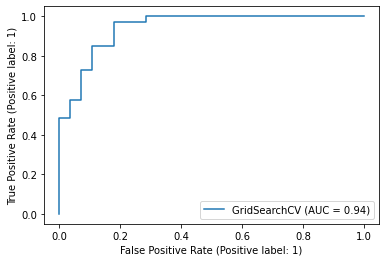

In [38]:
#Now we want to plot the ROC curve using plot_roc_curve. This will also give AUC score

plot_roc_curve(lreg_gs, X_test, y_test)

In [39]:
print(confusion_matrix(y_test, y_preds))

[[23  5]
 [ 2 31]]


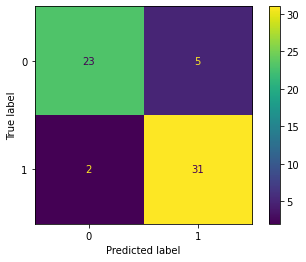

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [43]:
lreg_gs.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [46]:
#Since classification_report is not cross-validated, we will need to provide CV scores for precision, recall, and f1

#First instantiate a Logistic Regression model using our best params
clf = LogisticRegression(C=0.7278953843983146, solver="liblinear")


In [49]:
#CV accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc.mean()

0.8182513661202186

In [50]:
#Cv precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec.mean()

0.8138514802551555

In [51]:
#CV recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_rec.mean()

0.8727272727272727

In [53]:
#CV f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1.mean()

0.8408267145594746

In [58]:
scores_dict = {"accuracy": cv_acc.mean(), "precision": cv_prec.mean(), "recall": cv_rec.mean(), "f1": cv_f1.mean()}

In [77]:
scores_df = pd.DataFrame(scores_dict, index=[0])

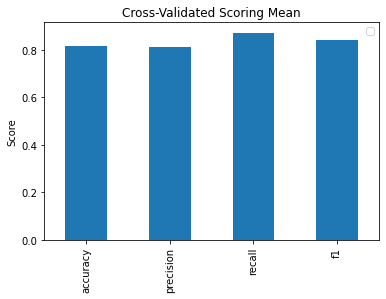

In [80]:
scores_df.T.plot.bar()
plt.ylabel("Score")
plt.title("Cross-Validated Scoring Mean")
plt.legend([]);

## Feature Importance
Feature importance is determining which features contributed the most to a correct classification, and how they contributed.
Finding feature importance is different for each ML model.

In [82]:
#Find best params and create instance of LogisticRegression model to fit to our X_train, y_train data

lreg_gs.best_params_

clf = LogisticRegression(C=0.7278953843983146, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [98]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'age': -9.450476184822516e-05,
 'sex': -1.1838546648696107,
 'cp': 0.6833202053875372,
 'trestbps': -0.010907928419220198,
 'chol': -0.0026857839486205464,
 'fbs': -0.09986506936784309,
 'restecg': 0.38927402167199865,
 'thalach': 0.025838068472111515,
 'exang': -0.8924749118539311,
 'oldpeak': -0.53185545129249,
 'slope': 0.42007477111608515,
 'ca': -0.6445734731830562,
 'thal': -0.5681383559059002}

In [99]:
feature_importance_df = pd.DataFrame(data=feature_dict, index=[0])

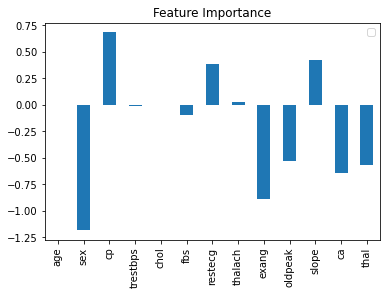

In [103]:
feature_importance_df.T.plot.bar()
plt.legend([])
plt.title("Feature Importance");

In [104]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see from the above graph, sec is negatively correlated to the target. As sex value goes up, the target proportionally goes down. In essence this means that the proportion of males in the dataset with heart diesease is lower than females.

In [105]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Chest pain was the feature with the highest positive correlation, meaning as chest pain goes up, the proportion of positive target values also goes up.

## 6. Experimentation
If you have not reached your evaluation metric yet, ask yourself:
* "Can you collect more samples?"
* "Could you try a better model?" (CatBoost or XGBoost)
* "Could we still improve the current models?" (More hyperparameter tuning.)

If you have hit your evaluation metric, export and share with others.